In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import spearmanr, pearsonr
pd.set_option('display.width', 2000)

In [40]:
nucleus_df = pd.read_csv('csv/nuclei_dagny.csv')
print(nucleus_df.head())

  Condition                                  ImageName  Label    Area                                           Centroid         CellType  Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity
0   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      1  2198.0  (8.411737943585077, 3200.1624203821657, 1855.0...  neunPositiveLow       NaN     24.656051     21.252047      8.360783    174.751137
1   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      2  1610.0  (16.583229813664595, 1307.6658385093167, 892.5...        Undefined       NaN      1.963975     20.104969      6.442236    161.168944
2   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      3  1939.0  (13.037132542547704, 3339.4445590510572, 1830....  neunPositiveLow       NaN     25.970088     26.956679      9.847344    195.312017
3   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      4  2431.0  (12.726450020567668, 1591.2558617852735, 1883....  neunPositiveLow       NaN     46.860551     32.361168     10.3

In [41]:
result = nucleus_df.groupby('ImageName').apply(lambda x: pearsonr(x['Ch1Intensity'], x['Ch3Intensity']))
print(result)

ImageName
291123_A1_772ko_NeuN-Arc-GFP_S1_HPC.czi                         (0.36595698154260936, 0.0)
291123_A3_775ko_NeuN-Arc-GFP_S3_HPC.czi         (0.2765588161974123, 7.1200650837632e-293)
291123_A4_802ko_NeuN-Arc-GFP_S3_HPC.czi                          (0.4183291959061612, 0.0)
291123_A5_803ko_NeuN-Arc-GFP_S2_HPC.czi                           (0.792354225221622, 0.0)
291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi    (0.20757102403274869, 2.176347443266877e-200)
291123_B4_808cntr_NeuN-Arc-GFP_S1_HPC.czi                       (0.46714592254773823, 0.0)
291123_B5_809cntr_NeuN-Arc-GFP_S2_HPC.czi                         (0.594156200563144, 0.0)
dtype: object


In [38]:
correlation_coefficients = result.apply(lambda x: x.correlation)
p_values = result.apply(lambda x: x.pvalue)
print(correlation_coefficients)
print(p_values)

ImageName
291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi    0.207566
291123_B4_808cntr_NeuN-Arc-GFP_S1_HPC.czi    0.467201
291123_B5_809cntr_NeuN-Arc-GFP_S2_HPC.czi    0.594156
dtype: float64
ImageName
291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi    2.230565e-200
291123_B4_808cntr_NeuN-Arc-GFP_S1_HPC.czi     0.000000e+00
291123_B5_809cntr_NeuN-Arc-GFP_S2_HPC.czi     0.000000e+00
dtype: float64


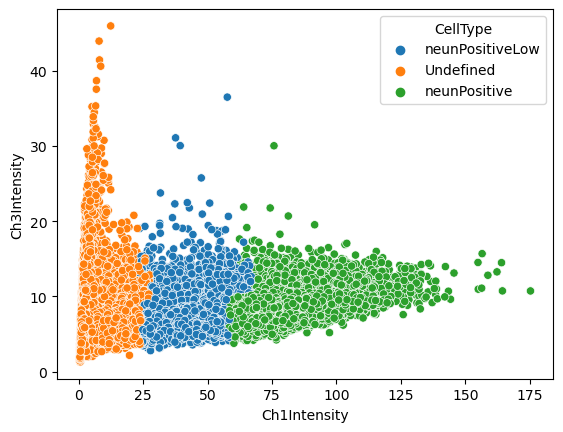

In [39]:
sns.scatterplot(data=nucleus_df[nucleus_df['Condition'] == 'Control'], x='Ch1Intensity', y='Ch3Intensity', hue='CellType')
plt.show()

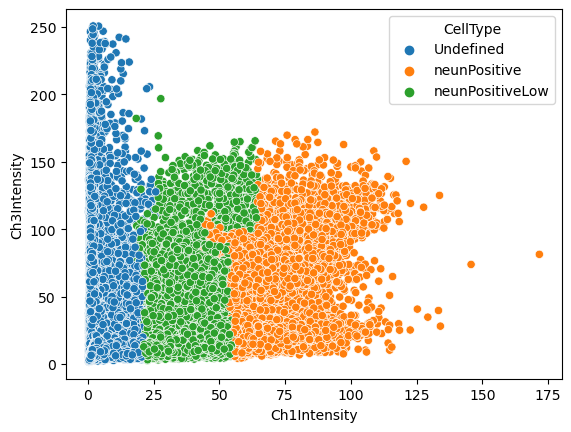

In [42]:
sns.scatterplot(data=nucleus_df[nucleus_df['Condition'] == 'HeterozygousKnockout'], x='Ch1Intensity', y='Ch3Intensity', hue='CellType')
plt.show()

                   Condition                                  ImageName  Label    Area                                           Centroid      CellType  Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity
0                    Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      1  2198.0  (8.411737943585077, 3200.1624203821657, 1855.0...  neunPositive       NaN     24.656051     21.252047      8.360783    174.751137
1                    Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      2  1610.0  (16.583229813664595, 1307.6658385093167, 892.5...     Undefined       NaN      1.963975     20.104969      6.442236    161.168944
2                    Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      3  1939.0  (13.037132542547704, 3339.4445590510572, 1830....  neunPositive       NaN     25.970088     26.956679      9.847344    195.312017
3                    Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      4  2431.0  (12.726450020567668, 1591.2558617852735,

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_18152\2839590522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hetero_df['CellType'] = hetero_df['CellType'].replace('neunPositiveLow', 'neunPositive')


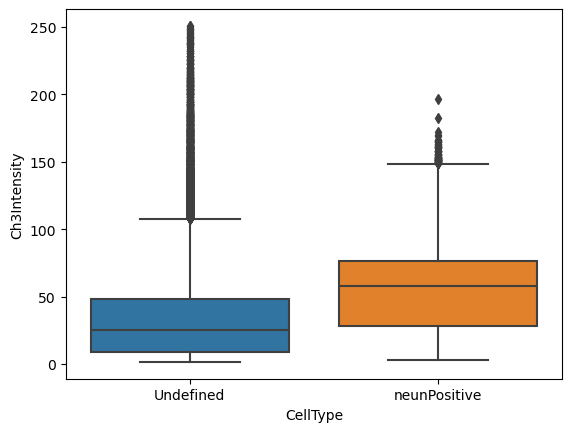

In [57]:
hetero_df = nucleus_df[nucleus_df['Condition'] == 'HeterozygousKnockout']
hetero_df['CellType'] = hetero_df['CellType'].replace('neunPositiveLow', 'neunPositive')
print(nucleus_df)

sns.boxplot(data=hetero_df, x='CellType', y='Ch3Intensity')
plt.show()



C:\Users\jonasvg\AppData\Local\Temp\ipykernel_18152\2311455550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_df['CellType'] = control_df['CellType'].replace('neunPositiveLow', 'neunPositive')


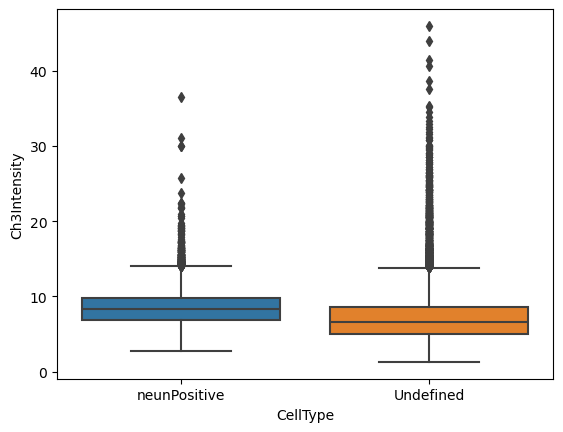

In [59]:
control_df = nucleus_df[nucleus_df['Condition'] == 'Control']
control_df['CellType'] = control_df['CellType'].replace('neunPositiveLow', 'neunPositive')

sns.boxplot(data=control_df, x='CellType', y='Ch3Intensity')
plt.show()